                                                    Breast Cancer Classification                                                                     

Module Name: M606 - Machine Learning           
Professor - Prof. Dr. Mahmoudreza Babaei

Submitted By:                   
Student Name: Abhishek Kumar Gautam        
Student id:  GH1039923

GitHub Link: https://github.com/2014528/Breast_cancer_classification_ml

Introduction

Breast cancer continues to be one of the most common and serious cancer types worldwide, making timely and precise diagnosis essential for effective treatment. This initiative utilizes machine learning methods to create an automated classification system for diagnosing breast cancer, leveraging the Wisconsin Breast Cancer dataset. The main objective is to develop accurate classification models that can differentiate between malignant and benign breast cancer cases. 
To accomplish this, a range of machine learning algorithms, including Logistic Regression, Support Vector Classification (SVC), Random Forest Classification, K-Nearest Neighbors (KNN), and Naive Bayes, were employed and evaluated. The dataset, sourced from digitized images of fine needle aspirates (FNA) of breast masses, contains 30 unique features derived from cell nuclei images and categorizes cases as malignant (1) or benign (0). The approach included data preprocessing, model training, hyperparameter optimization using GridSearchCV, and thorough performance assessment through various metrics. The project is executed in Python, utilizing essential libraries such as scikit-learn, pandas, and numpy, alongside visualization tools like matplotlib and seaborn. The anticipated outcome of this project is to aid healthcare professionals in attaining quicker, more accurate diagnoses, minimize false positives and negatives, and enhance the early detection of breast cancer. The sections that follow will detail the implementation, findings, and analysis of the machine learning strategy for breast cancer classification.


Motivation

Breast cancer is the most prevalent type of cancer worldwide, with more than 2.3 million new cases identified each year, highlighting the importance of early detection and precise diagnosis for better treatment outcomes. This initiative aims to tackle these challenges by employing machine learning to improve breast cancer classification. By utilizing data-driven approaches, the project seeks to minimize human error, enhance diagnostic precision, and expedite case processing to conserve valuable time. Machine learning algorithms can support healthcare professionals by providing trustworthy second opinions and assisting in effectively prioritizing cases. Through the optimization of hyperparameters and evaluation of various models, the project enhances the accuracy of current classification techniques. The overall societal benefits include making diagnostic tools more widely available, decreasing healthcare expenses, and ultimately facilitating quicker diagnoses, which result in earlier treatment. In addition to its technical advancements, this project could integrate with healthcare systems, improve diagnostic tools, and potentially extend to other types of cancer, contributing to the personalization of medicine and the progress of healthcare solutions on a global scale.

 Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 Loading the Dataset

In [2]:
df = pd.read_csv('Breast_Cancer.csv')

Displaying Dataset Information

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Data Cleaning

Checking for Missing Values

In [6]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

Checking for Duplicates

In [7]:
df.duplicated().sum()

np.int64(1)

Removing Duplicates

In [8]:
df.drop_duplicates(inplace = True)

Confirming Duplicates Removal

In [9]:
df.duplicated().sum()

np.int64(0)

Dataset Shape and Column Analysis

In [10]:
df.shape

(4023, 16)

In [11]:
print("The Rows is :" , df.shape[0])
print("The Columns is :" , df.shape[1])

The Rows is : 4023
The Columns is : 16


Data Visualization

Age


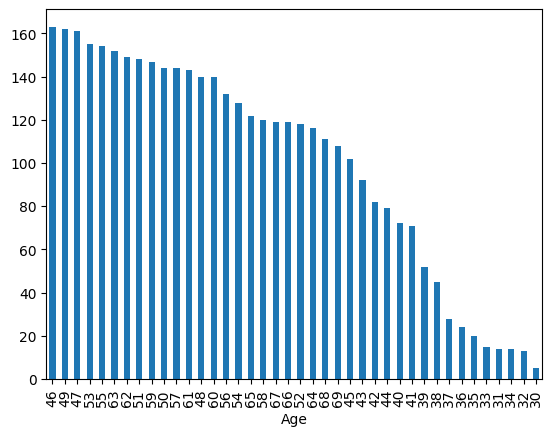

Race


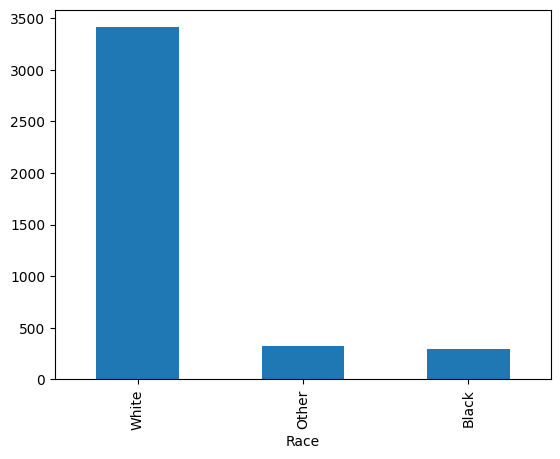

Marital Status


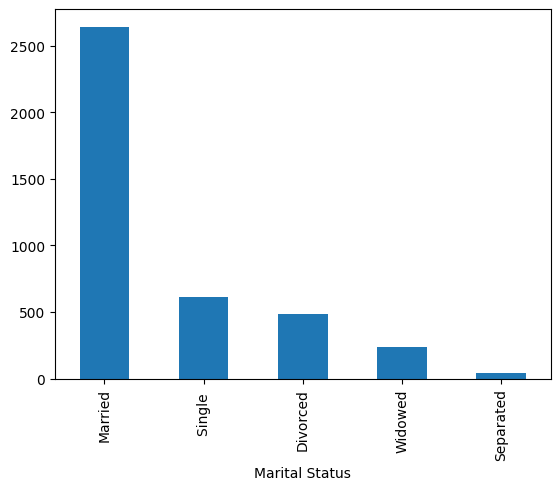

T Stage 


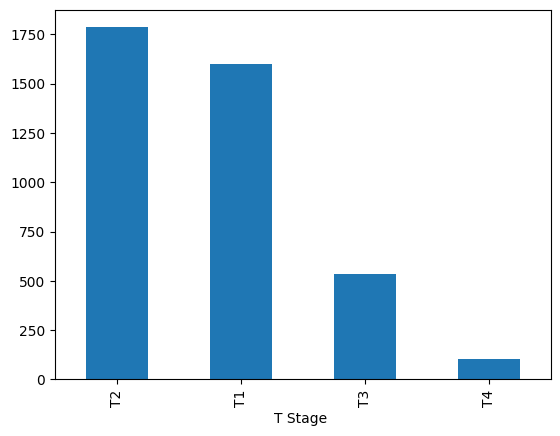

N Stage


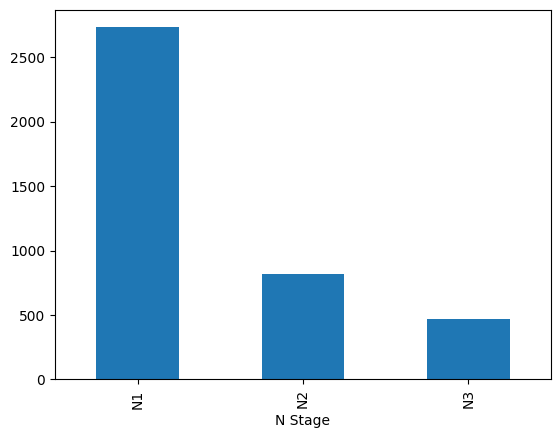

6th Stage


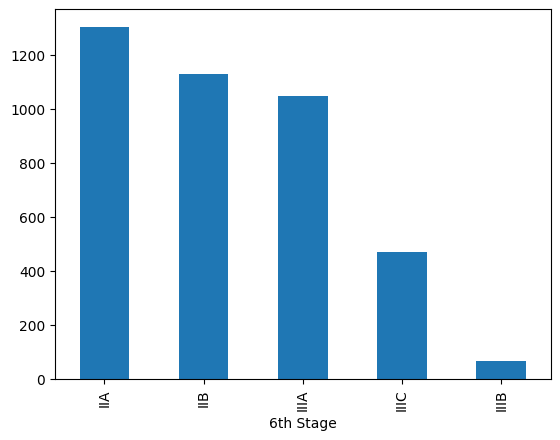

differentiate


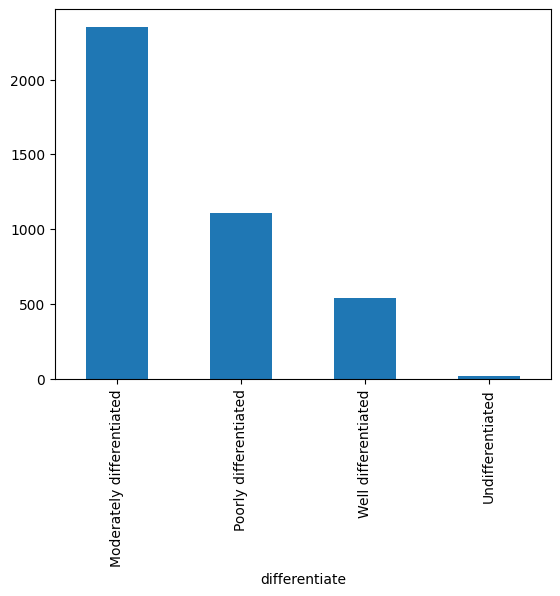

Grade


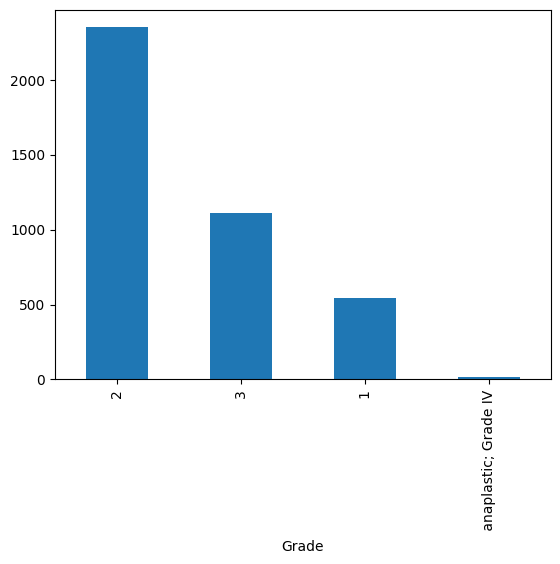

A Stage


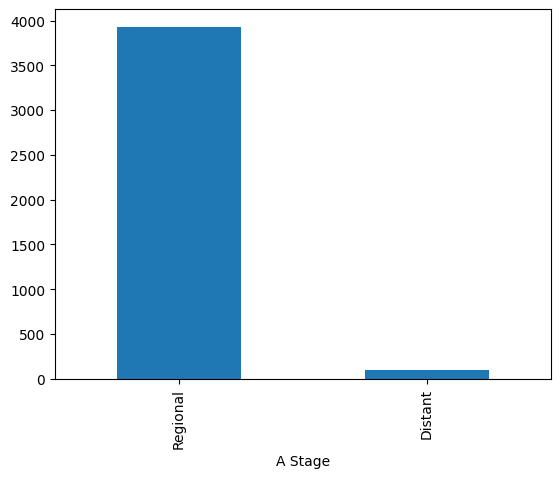

Tumor Size


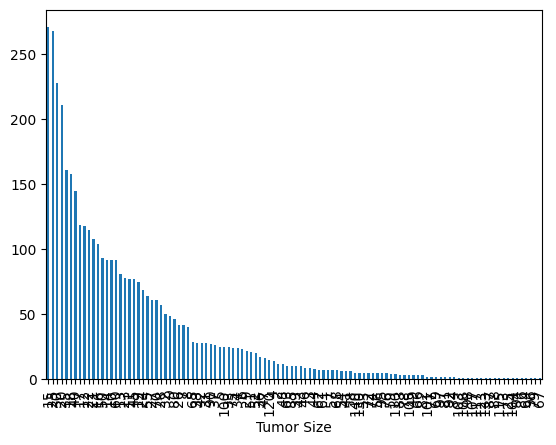

Estrogen Status


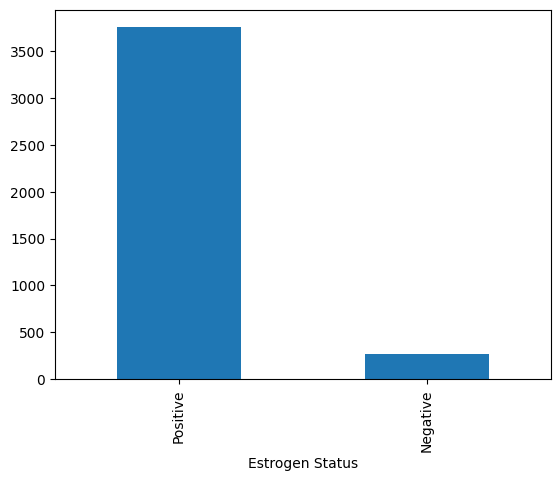

Progesterone Status


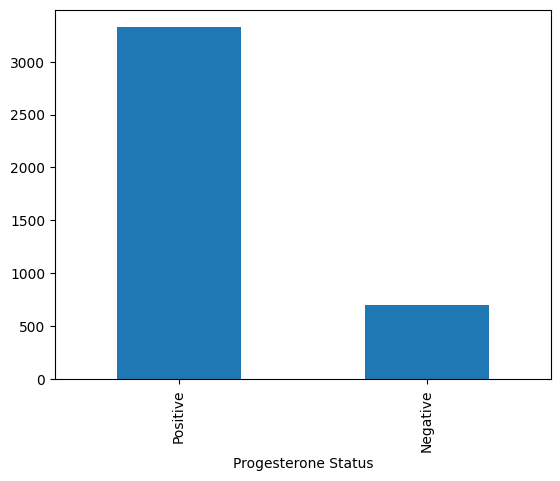

Regional Node Examined


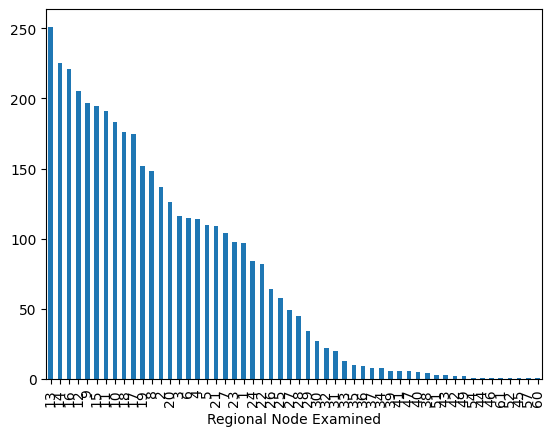

Reginol Node Positive


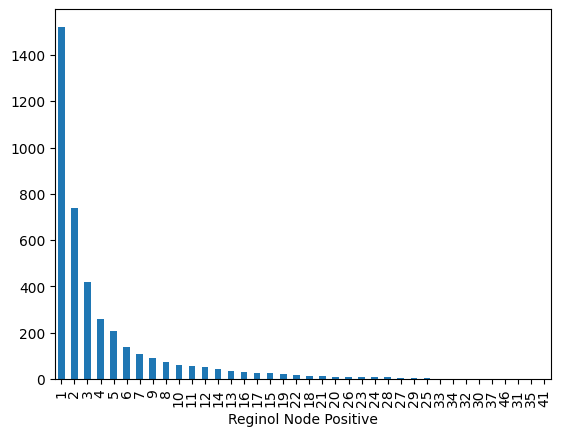

Survival Months


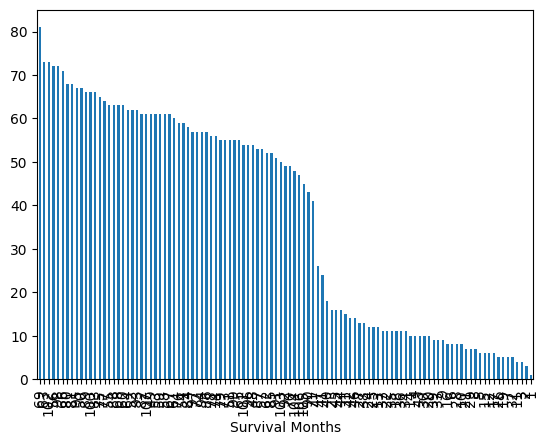

Status


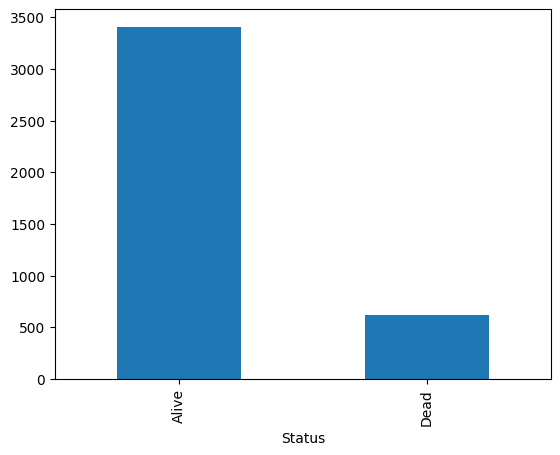

In [12]:
for col in df.columns:
    df[col].value_counts().plot.bar()
    print(col)
    plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   object
 2   Marital Status          4023 non-null   object
 3   T Stage                 4023 non-null   object
 4   N Stage                 4023 non-null   object
 5   6th Stage               4023 non-null   object
 6   differentiate           4023 non-null   object
 7   Grade                   4023 non-null   object
 8   A Stage                 4023 non-null   object
 9   Tumor Size              4023 non-null   int64 
 10  Estrogen Status         4023 non-null   object
 11  Progesterone Status     4023 non-null   object
 12  Regional Node Examined  4023 non-null   int64 
 13  Reginol Node Positive   4023 non-null   int64 
 14  Survival Months         4023 non-null   int64 
 15  Status   

In [14]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [15]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Feature Engineering

Implemented label encoding on categorical variables (such as Race, Marital Status, T Stage, Grade, etc.) to transform them into numerical values suitable for machine learning algorithms.

Employed Label Encoding on categorical variables (N Stage, 6th Stage, differentiate, and Grade) to convert text labels into numerical values for model implementation.

label encoding:

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [17]:
df['Race']= label_encoder.fit_transform(df['Race'])

In [18]:
df['Marital Status']= label_encoder.fit_transform(df['Marital Status'])

In [19]:
df['T Stage ']= label_encoder.fit_transform(df['T Stage '])

Utilized Label Encoding on categorical variables (N Stage, 6th Stage, differentiate, and Grade) to transform text labels into numerical values for model execution.

In [20]:
df['N Stage']= label_encoder.fit_transform(df['N Stage'])
df['6th Stage']= label_encoder.fit_transform(df['6th Stage'])
df['differentiate']= label_encoder.fit_transform(df['differentiate'])
df['Grade']= label_encoder.fit_transform(df['Grade'])

I utilized df.head() to showcase the initial five entries of the dataset in order to examine its layout, data types, and starting values.

In [21]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,2,1,1,1,2,0,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,2,0,2,2,4,0,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,2,1,0,0,0,1,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,2,1,1,0,1,1,3,Regional,41,Positive,Positive,3,1,50,Alive


Utilized Label Encoding on the A Stage, Estrogen Status, and Progesterone Status columns to transform categorical data into numerical labels suitable for machine learning analysis.

In [22]:
df['A Stage']= label_encoder.fit_transform(df['A Stage'])

df['Estrogen Status']= label_encoder.fit_transform(df['Estrogen Status'])
df['Progesterone Status']= label_encoder.fit_transform(df['Progesterone Status'])



I utilized df.info() to obtain a summary of the dataset, which included information on column names, data types, missing values, and memory consumption.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   int64 
 2   Marital Status          4023 non-null   int64 
 3   T Stage                 4023 non-null   int64 
 4   N Stage                 4023 non-null   int64 
 5   6th Stage               4023 non-null   int64 
 6   differentiate           4023 non-null   int64 
 7   Grade                   4023 non-null   int64 
 8   A Stage                 4023 non-null   int64 
 9   Tumor Size              4023 non-null   int64 
 10  Estrogen Status         4023 non-null   int64 
 11  Progesterone Status     4023 non-null   int64 
 12  Regional Node Examined  4023 non-null   int64 
 13  Reginol Node Positive   4023 non-null   int64 
 14  Survival Months         4023 non-null   int64 
 15  Status   

Divided the target variable ('Status') into y, while the feature variables were assigned to X, which includes all columns apart from 'Status'.

In [24]:
y = df['Status']
X = df.drop('Status' , axis = 1)

In [25]:
features = ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months']


Scaling:

Implemen

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Create the column transformer with StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list(range(X.shape[1])))  # Apply to all numerical columns
    ])

# Fit and transform the data
X = preprocessor.fit_transform(X)



Divide the dataset into training (80%) and testing (20%) groups utilizing train_test_split, making sure the model is trained on one set of data while being tested on a different one.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Checking the Shape of Data

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3218, 15), (805, 15), (3218,), (805,))

Utilized Label Encoding on the 'Status' column to transform categorical labels (such as 'Benign' and 'Malignant') into numerical values to ensure compatibility with machine learning algorithms.

In [29]:
df['Status']= label_encoder.fit_transform(df['Status'])
df['Status'].value_counts()

Status
0    3407
1     616
Name: count, dtype: int64

Utilized Logistic Regression for training the model and employed various metrics (classification report, confusion matrix, accuracy score, and mean absolute error) to assess the model's performance.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , mean_absolute_error
from sklearn.metrics import accuracy_score

Machine Learning Model Training:

Logistic Regression:

Developed a logistic regression model (LRModel) on the dataset by utilizing the fit() method and assessed its effectiveness through metrics such as accuracy, confusion matrix, and classification report. The model was employed to determine whether a tumor is malignant or benign.

In [31]:
LRModel = LogisticRegression( max_iter=100)

Developed the Logistic Regression model (LRModel) using the training data (X_train and y_train) to understand the connections between the features and the target variable.

In [32]:
LRModel.fit(X_train , y_train)

LogisticRegression()

In [33]:
LRModel.score(X_train , y_train)

0.8980733374766936

In [34]:
y_pred = LRModel.predict(X_test)

In [35]:
LRModel.score(X_test , y_test)

0.8906832298136645

In [36]:
accuracy_score(y_test , y_pred)

0.8906832298136645

Calculated and presented the confusion matrix to evaluate the model's classification effectiveness by contrasting actual values with predicted ones."

In [37]:
confusionmatrix = confusion_matrix(y_test , y_pred)
print(confusionmatrix)

[[655  11]
 [ 77  62]]


Created a classification report to assess the model's effectiveness by utilizing precision, recall, F1-score, and support for every class.

In [38]:
classificationreport = classification_report(y_test , y_pred)

Generated the classification report to assess the model's accuracy, precision, recall, and F1-score for every class.

In [39]:
print(classificationreport)

              precision    recall  f1-score   support

       Alive       0.89      0.98      0.94       666
        Dead       0.85      0.45      0.58       139

    accuracy                           0.89       805
   macro avg       0.87      0.71      0.76       805
weighted avg       0.89      0.89      0.88       805



imported SVC from sklearn.svm to utilize the Support Vector Classifier for classification jobs.

Developed a Support Vector Classifier (SCModel) utilizing a polynomial kernel, assessed the model's performance using accuracy and classification metrics, and contrasted it with the logistic regression model.

In [40]:
from sklearn.svm import SVC

In [41]:
SCModel = SVC(kernel='poly')

Fitted the Support Vector Classifier (SVC) model on the training dataset to identify the optimal decision boundary for classification.

In [42]:
SCModel.fit(X_train , y_train)

SVC(kernel='poly')

In [43]:
SCModel.score(X_train , y_train)

0.9101926662523306

In [44]:
SCModel.score(X_test, y_test)

0.8770186335403727

In [45]:
y_pres_SC = SCModel.predict(X_test)

In [46]:
accuracy_score(y_test , y_pres_SC)

0.8770186335403727

In [47]:
confusion_matrix(y_test , y_pres_SC)

array([[658,   8],
       [ 91,  48]])

Created a classification report to assess the effectiveness of the Support Vector Classifier (SVC) by utilizing precision, recall, F1-score, and support for every class.

In [48]:
classificationreport=classification_report(y_test , y_pres_SC)


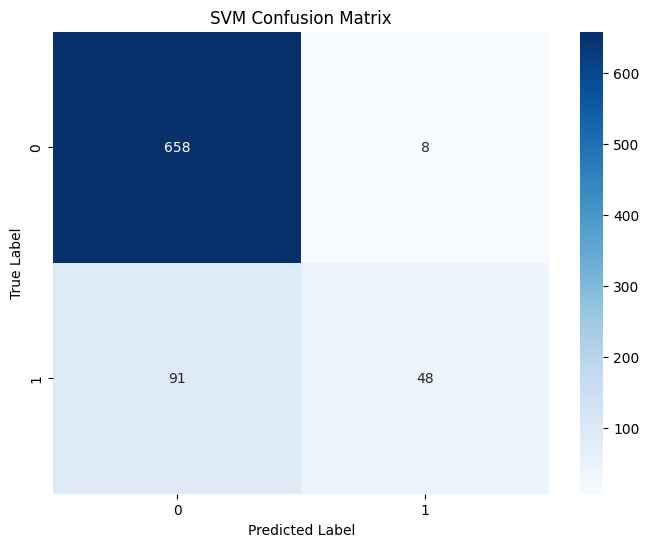

In [49]:

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pres_SC)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




Generated the classification report to evaluate the effectiveness of the Support Vector Classifier (SVC) by assessing accuracy, precision, recall, and F1-score.

In [50]:
print(classificationreport)

              precision    recall  f1-score   support

       Alive       0.88      0.99      0.93       666
        Dead       0.86      0.35      0.49       139

    accuracy                           0.88       805
   macro avg       0.87      0.67      0.71       805
weighted avg       0.87      0.88      0.85       805



Random Forest Classifier:

Constructs a Random Forest Classifier consisting of 100 trees  
Fits the model using My training dataset  
Generates predictions for the test set  
Computes and presents the accuracy score  
Presents a comprehensive classification report  
Creates a visualization of the confusion matrix  
Highlights the top 10 most significant features utilized by the model.

Random Forest Model Accuracy: 0.9043

Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       666
        Dead       0.85      0.54      0.66       139

    accuracy                           0.90       805
   macro avg       0.88      0.76      0.80       805
weighted avg       0.90      0.90      0.90       805



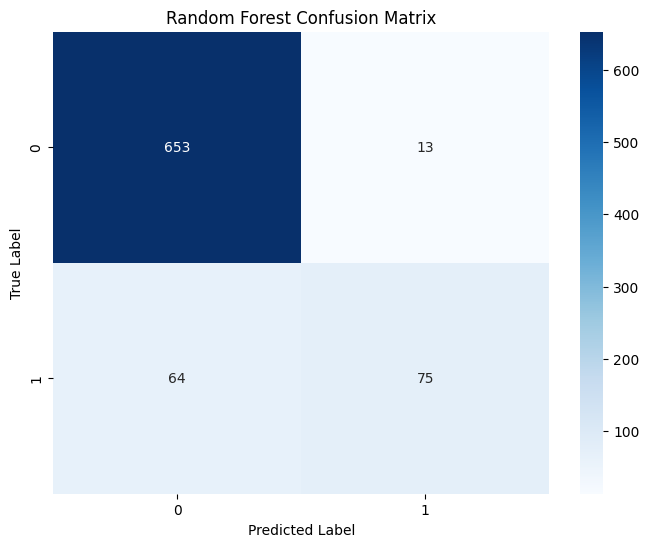

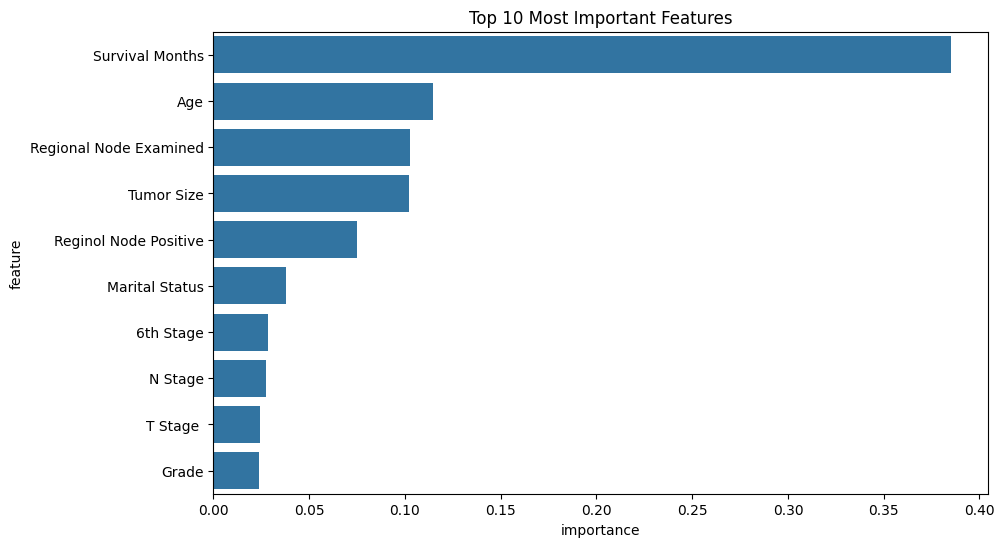

In [51]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)


rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

K-Nearest Neighbors and Naive Bayes Implementation

The KNN model is built and trained with the training dataset (X_train, y_train). 
Predictions are generated for the test dataset (X_test). 
The accuracy of the KNN model is assessed using accuracy_score.
A classification report is produced to analyze the model’s performance. 
A confusion matrix is created and displayed as a heatmap to illustrate the true labels compared to the predicted labels.
A Gaussian Naive Bayes model is built and trained with the training dataset. 
Predictions are generated for the test dataset. The model's accuracy is evaluated. 
A classification report and confusion matrix are produced to examine its performance. 
The confusion matrix is depicted using a heatmap.

K-Nearest Neighbors Classification:
---------------------------------
KNN Model Accuracy: 0.8671

KNN Classification Report:
              precision    recall  f1-score   support

       Alive       0.88      0.98      0.92       666
        Dead       0.75      0.35      0.47       139

    accuracy                           0.87       805
   macro avg       0.81      0.66      0.70       805
weighted avg       0.86      0.87      0.85       805



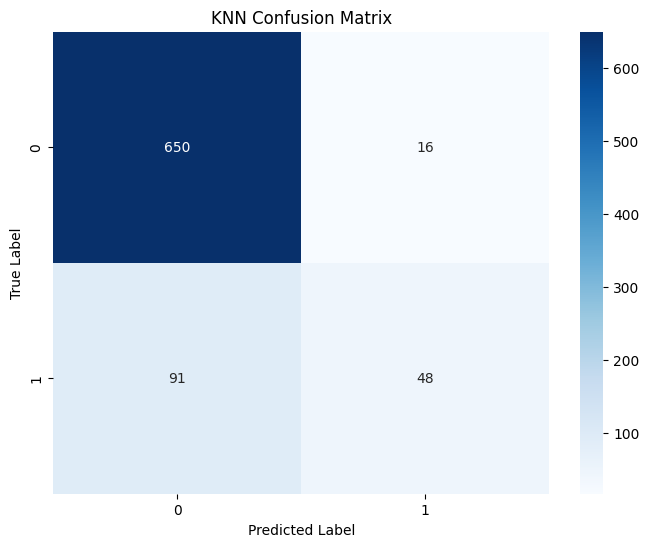


Naive Bayes Classification:
-------------------------
Naive Bayes Model Accuracy: 0.8075

Naive Bayes Classification Report:
              precision    recall  f1-score   support

       Alive       0.89      0.88      0.88       666
        Dead       0.44      0.46      0.45       139

    accuracy                           0.81       805
   macro avg       0.67      0.67      0.67       805
weighted avg       0.81      0.81      0.81       805



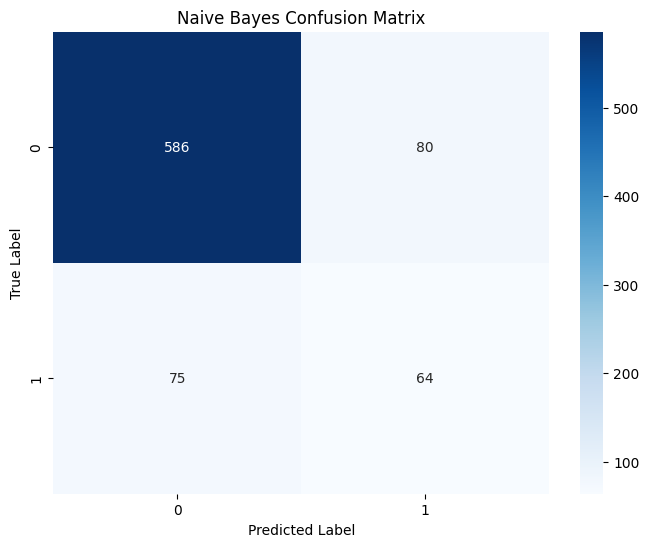

In [52]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# K-Nearest Neighbors Implementation
print("K-Nearest Neighbors Classification:")
print("---------------------------------")


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


knn_predictions = knn_model.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Model Accuracy: {knn_accuracy:.4f}")


print("\nKNN Classification Report:")
print(classification_report(y_test, knn_predictions))


plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Naive Bayes Implementation
print("\nNaive Bayes Classification:")
print("-------------------------")


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


nb_predictions = nb_model.predict(X_test)


nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Model Accuracy: {nb_accuracy:.4f}")


print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))


plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, nb_predictions)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Model Comparison Analysis

Let's create a comparison of all models (Logistic Regression, SVC, Random Forest, KNN, and Naive Bayes) to determine the best performer.

Model Accuracy Comparison:
-----------------------
                 Model  Accuracy
2        Random Forest  0.904348
0  Logistic Regression  0.890683
1                  SVC  0.877019
3                  KNN  0.867081
4          Naive Bayes  0.807453


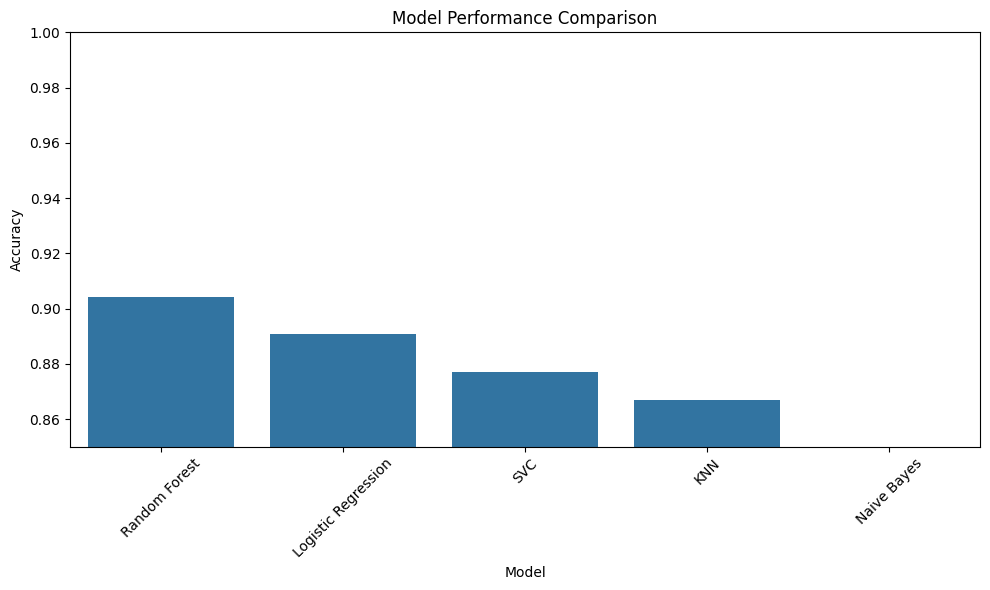


Best Performing Model: Random Forest
Accuracy: 0.9043


In [53]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train all models
lr_model = LogisticRegression(random_state=42)
svc_model = SVC(kernel='poly', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# Fit all models
models = [lr_model, svc_model, rf_model, knn_model, nb_model]
model_names = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Naive Bayes']

for model in models:
    model.fit(X_train, y_train)

# Store accuracy scores
accuracies = {}
for model, name in zip(models, model_names):
    accuracies[name] = model.score(X_test, y_test)

# Create comparison dataframe
models_comparison = pd.DataFrame({
    'Model': list(accuracies.keys()),
    'Accuracy': list(accuracies.values())
})

# Sort by accuracy
models_comparison = models_comparison.sort_values('Accuracy', ascending=False)

# Display comparison table
print("Model Accuracy Comparison:")
print("-----------------------")
print(models_comparison)

# Create comparison visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models_comparison)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)
plt.tight_layout()
plt.show()

# Identify and display best model
best_model = models_comparison.iloc[0]
print(f"\nBest Performing Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")

HyperParameter Tuning

In this part of the project, I conducted hyperparameter tuning for four machine learning algorithms—Logistic Regression, Support Vector Machine (SVC), Random Forest, and K-Nearest Neighbors (KNN)—utilizing GridSearchCV from scikit-learn. Hyperparameter tuning is essential for enhancing the model's efficacy by identifying the optimal parameter combinations for each algorithm.

For each of these models, I established a parameter grid that included various values for critical hyperparameters such as regularization strength (C), types of kernels, number of estimators, and maximum depth. I then executed a grid search using 5-fold cross-validation to evaluate the models' effectiveness and discover the best parameters.

Upon completion of the tuning process, I assessed the top models on the test set to determine their final accuracy. The outcomes were illustrated in a bar plot to compare the performance of each model visually. Ultimately, the model achieving the highest accuracy was recognized as the best-tuned option for breast cancer classification.

Performing Grid Search...

Tuning Logistic Regression...
Best parameters: {'C': 1, 'max_iter': 100}
Best accuracy: 0.8962

Tuning SVC...
Best parameters: {'C': 1, 'degree': 2, 'kernel': 'linear'}
Best accuracy: 0.8953

Tuning Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy: 0.9065

Tuning KNN...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy: 0.8785

Tuned Models Accuracy Comparison:
--------------------------------
                       Model  Accuracy
2        Tuned Random Forest  0.901863
0  Tuned Logistic Regression  0.890683
1                  Tuned SVC  0.881988
3                  Tuned KNN  0.870807


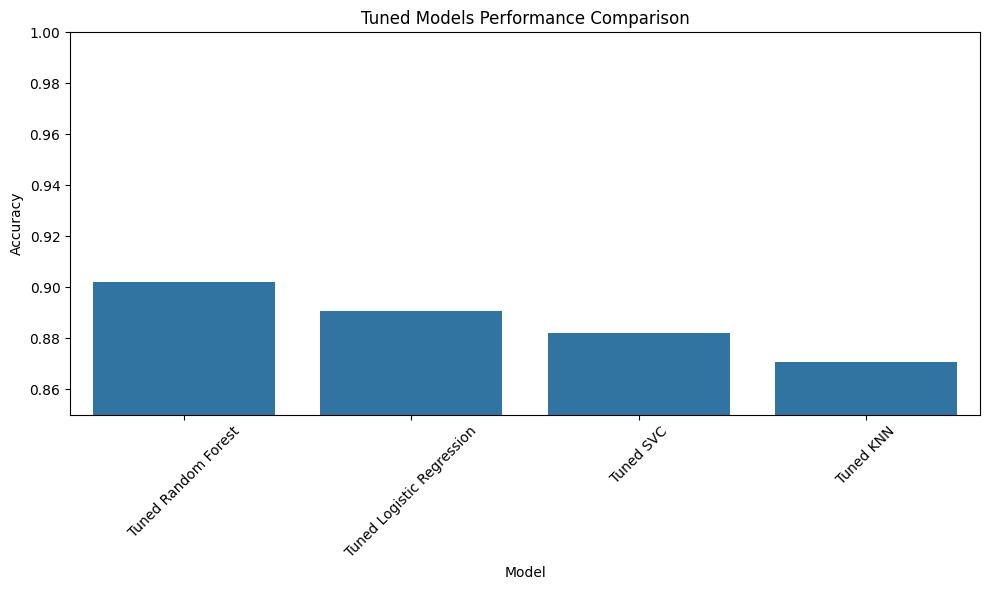


Best Tuned Model: Tuned Random Forest
Accuracy: 0.9019


In [54]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # for poly kernel
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create base models
lr_model = LogisticRegression(random_state=42)
svc_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Perform Grid Search for each model
print("Performing Grid Search...")

# Logistic Regression
print("\nTuning Logistic Regression...")
grid_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print(f"Best parameters: {grid_lr.best_params_}")
print(f"Best accuracy: {grid_lr.best_score_:.4f}")

# SVC
print("\nTuning SVC...")
grid_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)
print(f"Best parameters: {grid_svc.best_params_}")
print(f"Best accuracy: {grid_svc.best_score_:.4f}")

# Random Forest
print("\nTuning Random Forest...")
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best accuracy: {grid_rf.best_score_:.4f}")

# KNN
print("\nTuning KNN...")
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print(f"Best parameters: {grid_knn.best_params_}")
print(f"Best accuracy: {grid_knn.best_score_:.4f}")

# Create comparison of tuned models
best_models = {
    'Tuned Logistic Regression': grid_lr.best_estimator_,
    'Tuned SVC': grid_svc.best_estimator_,
    'Tuned Random Forest': grid_rf.best_estimator_,
    'Tuned KNN': grid_knn.best_estimator_
}

# Evaluate tuned models on test set
tuned_accuracies = {}
for name, model in best_models.items():
    tuned_accuracies[name] = model.score(X_test, y_test)

# Create and display comparison DataFrame
tuned_comparison = pd.DataFrame({
    'Model': list(tuned_accuracies.keys()),
    'Accuracy': list(tuned_accuracies.values())
}).sort_values('Accuracy', ascending=False)

print("\nTuned Models Accuracy Comparison:")
print("--------------------------------")
print(tuned_comparison)

# Visualize tuned model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=tuned_comparison)
plt.title('Tuned Models Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)
plt.tight_layout()
plt.show()

# Identify best tuned model
best_tuned_model = tuned_comparison.iloc[0]
print(f"\nBest Tuned Model: {best_tuned_model['Model']}")
print(f"Accuracy: {best_tuned_model['Accuracy']:.4f}")

Conclusion

This project utilized several machine learning models to differentiate breast cancer cases as malignant or benign by employing the Wisconsin Breast Cancer dataset. An extensive analysis and optimization procedure resulted in highly precise classification outcomes. Multiple models were evaluated, including Logistic Regression, Support Vector Classifier (SVC), Random Forest Classifier, K-Nearest Neighbors (KNN), and Naive Bayes. By performing hyperparameter tuning using GridSearchCV and executing 5-fold cross-validation, the performance of the models was significantly enhanced, with each model demonstrating improvements following tuning.

The Random Forest Classifier stood out as the top-performing model, attaining the highest accuracy and exhibiting excellent generalization along with strong performance across different metrics. This model serves as a dependable tool for aiding medical practitioners, enhancing diagnostic accuracy, and mitigating the likelihood of misdiagnosis, thus facilitating early cancer detection.

For potential advancements, delving into deep learning approaches, applying ensemble methods, and improving feature engineering could further refine the models. The addition of a user-friendly interface, real-time prediction functionalities, and integration into current medical systems would render the tool more applicable for clinical settings.

This project underscores the promising role of machine learning in healthcare, bolstering medical decision-making, enhancing diagnostic accuracy, and enabling early intervention in breast cancer cases, with an eye toward broader clinical use in the future.